In [1]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from stopwords import gr_stopwords

C:\Users\jtoli\miniconda3\envs\greeknlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('data/greek_news_climate.tar.bz2')
df['published_date'] = pd.to_datetime(df['published_date'])

In [4]:
df = df.query(" _score > 30 ")

df.shape

(5443, 19)

In [5]:
mask = df['summary'].notna()
df.loc[mask, 'summary']

news_list = df.loc[mask, 'summary'].to_list()
timestamps = df.loc[mask, 'published_date'].to_list()

In [21]:
vectorizer_model = CountVectorizer(stop_words = gr_stopwords)

topic_model = BERTopic(language = 'multilingual', nr_topics = 5,
                       vectorizer_model = vectorizer_model, verbose = True)
                     

In [22]:
topics, probs = topic_model.fit_transform(news_list)

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:25<00:00,  6.60it/s]
2022-10-21 07:16:29,393 - BERTopic - Transformed documents to Embeddings
2022-10-21 07:16:33,803 - BERTopic - Reduced dimensionality
2022-10-21 07:16:34,022 - BERTopic - Clustered reduced embeddings
2022-10-21 07:16:42,622 - BERTopic - Reduced number of topics from 164 to 6


In [23]:
topic_model.get_topic_info().head(30)

,Topic,Count,Name
0,-1,4198,-1_κλιματική_αλλαγή_κρίση_ελλάδα
1,0,494,0_κλιματική_αλλαγή_χρόνια_πλανήτη
2,1,227,1_ουκρανία_επισιτιστική_εκατομμύρια_τροφίμων
3,2,226,2_cop26_χώρες_συμφωνία_κλιματική
4,3,162,3_esm_ευρωζώνη_σοκ_ταμείου
5,4,136,4_κλιματική_κλιματικής_αλλαγή_κληρονομιάς


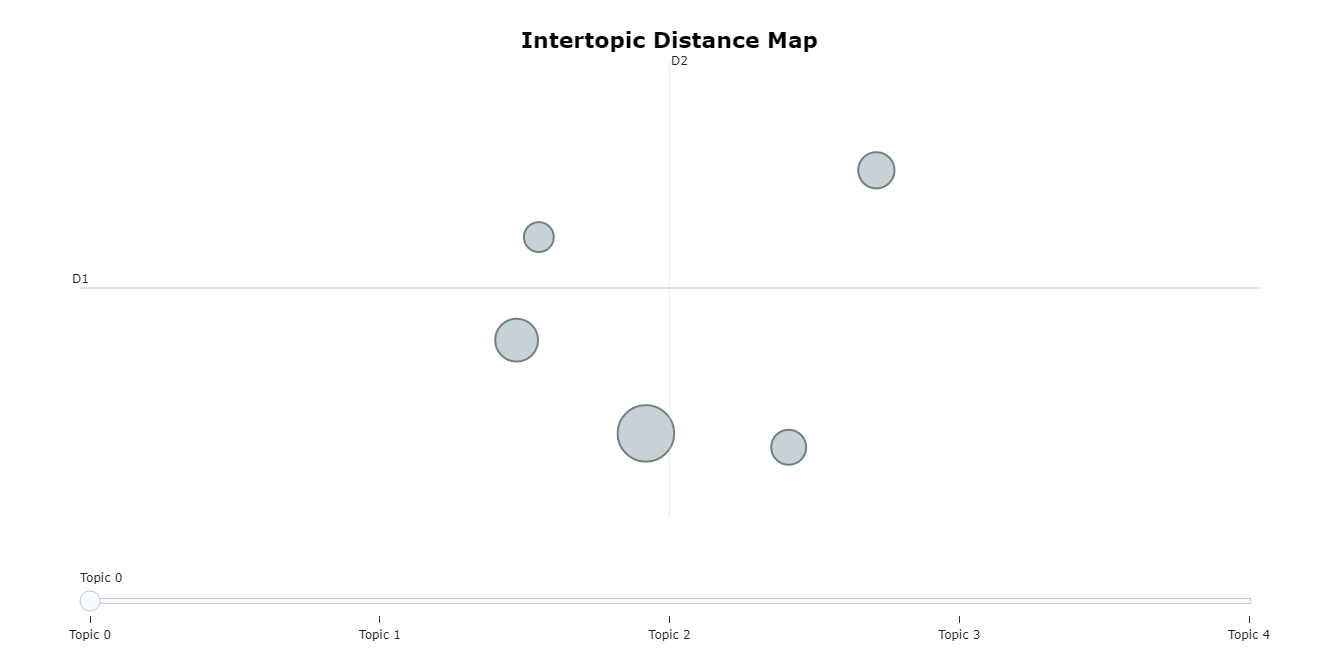

In [39]:
topic_model.visualize_topics()

2276it [02:12, 17.23it/s]


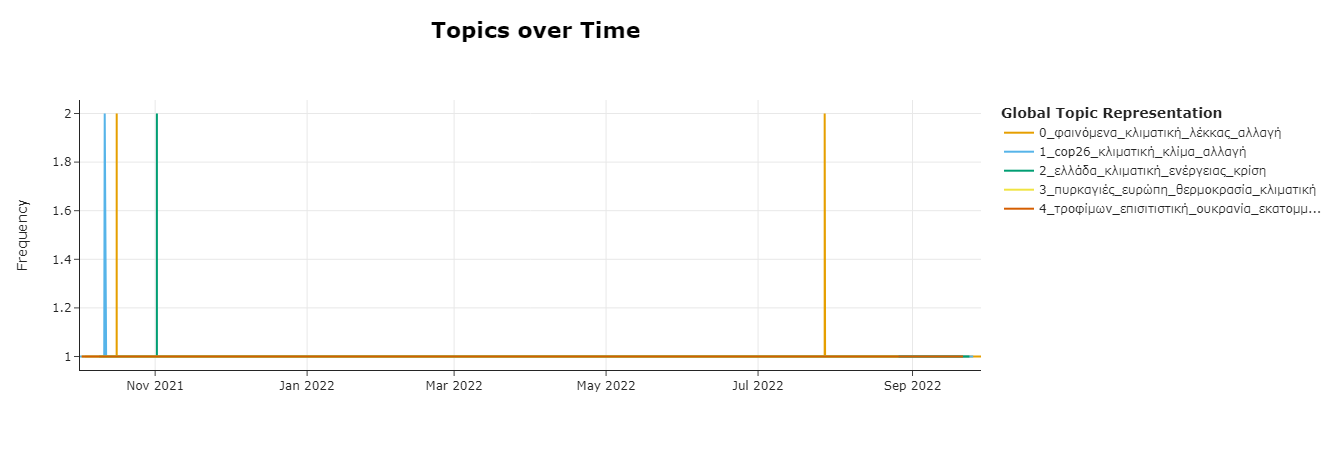

In [42]:
topics_over_time = topic_model.topics_over_time(news_list, timestamps)

topic_model.visualize_topics_over_time(topics_over_time)